<a href="https://colab.research.google.com/github/Piya88/House_Price_Prediction/blob/main/Linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
hp = pd.read_csv("/content/drive/MyDrive/house_prices.csv")
hp

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,...,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,NaN,NaN
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,...,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,NaN,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,...,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,NaN,NaN
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,...,NaN,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,NaN,NaN


In [3]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [4]:
# from above we can see Super Area, dimensions & Plot Area has 0 non-null values that means this features doesn't have any data.

hp1 = hp.iloc[:, 0:17]
hp1.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered


In [5]:
hp1.nunique()

Index                187531
Title                 32446
Description           65634
Amount(in rupees)      1561
Price (in rupees)     10958
location                 81
Carpet Area            2758
Status                    1
Floor                   947
Transaction               4
Furnishing                3
facing                    8
overlooking              19
Society               10376
Bathroom                 11
Balcony                  11
Car Parking             229
dtype: int64

In [6]:
hp1['BHK'] = hp1['Title'].str.extract('(\d+)', expand=False)
#hp1['Super_Area_sqft'] = hp1['Super Area'].str.extract('(\d+)', expand=False)
hp1['Carpet_area_sqft'] = hp1['Carpet Area'].str.extract('(\d+)', expand=False)
hp1['Floor'] = hp1['Floor'].str.extract('(\d+)', expand=False)


hp1.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,BHK,Carpet_area_sqft
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,1,500
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,2,473
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,2,779
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,1,530
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,2,635


In [7]:
hp1['Floor'] = hp1['Floor'].str.extract('(\d+)', expand=False)

for i in range(0, 187531):
    if 'Cr' in hp1.iloc[i,3]:
        hp1.iloc[i,3] = (float((hp1.iloc[i,3]).split(' ')[0]) * 100)
    elif 'Lac' in hp1.iloc[i,3]:
        hp1.iloc[i,3] = int(float((hp1.iloc[i,3]).split(' ')[0]))
    else:
        hp1.drop(i) # dropping records where amount is mentioned as "call for price"


hp1.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,BHK,Carpet_area_sqft
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42,6000.0,thane,500 sqft,Ready to Move,10,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,1,500
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98,13799.0,thane,473 sqft,Ready to Move,3,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,2,473
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,140.0,17500.0,thane,779 sqft,Ready to Move,10,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,2,779
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25,NaN,thane,530 sqft,Ready to Move,1,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,1,530
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",160.0,18824.0,thane,635 sqft,Ready to Move,20,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,2,635


In [8]:
hp1 = hp1[~ hp1['Amount(in rupees)'].isin(['Call for Price'])]

hp1

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,BHK,Carpet_area_sqft
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42,6000.0,thane,500 sqft,Ready to Move,10,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,1,500
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98,13799.0,thane,473 sqft,Ready to Move,3,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,2,473
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,140.0,17500.0,thane,779 sqft,Ready to Move,10,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,2,779
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25,NaN,thane,530 sqft,Ready to Move,1,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,1,530
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",160.0,18824.0,thane,635 sqft,Ready to Move,20,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,2,635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63,3225.0,zirakpur,NaN,Ready to Move,2,New Property,Semi-Furnished,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,3,NaN
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55,3274.0,zirakpur,NaN,Ready to Move,4,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,3,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76,4343.0,zirakpur,1250 sqft,Ready to Move,1,Resale,Furnished,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",3,1250
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30,4231.0,zirakpur,NaN,Ready to Move,2,Resale,Semi-Furnished,NaN,Main Road,Friends Enclave,2,NaN,NaN,2,NaN


In [9]:
hp1['Amount'] = hp1['Amount(in rupees)']

hp1.head()

<ipython-input-9-d4b5a5186175>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp1['Amount'] = hp1['Amount(in rupees)']


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,BHK,Carpet_area_sqft,Amount
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42,6000.0,thane,500 sqft,Ready to Move,10,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,1,500,42
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98,13799.0,thane,473 sqft,Ready to Move,3,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,2,473,98
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,140.0,17500.0,thane,779 sqft,Ready to Move,10,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,2,779,140.0
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25,NaN,thane,530 sqft,Ready to Move,1,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,1,530,25
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",160.0,18824.0,thane,635 sqft,Ready to Move,20,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,2,635,160.0


In [10]:
# we don't need index, title, description, 'Status', 'Carpet Area', 'Society'  feature as it doesn't ontribute forpredicting house prices.
# And Car parking is having missing values around 1 lakh.

hp2 = hp1.iloc[:, 4:]

hp2 = hp2.drop(columns=['Status', 'Carpet Area', 'Society', 'Car Parking'])
hp2

,Price (in rupees),location,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,BHK,Carpet_area_sqft,Amount
0,6000.0,thane,10,Resale,Unfurnished,NaN,NaN,1,2,1,500,42
1,13799.0,thane,3,Resale,Semi-Furnished,East,Garden/Park,2,NaN,2,473,98
2,17500.0,thane,10,Resale,Unfurnished,East,Garden/Park,2,NaN,2,779,140.0
3,NaN,thane,1,Resale,Unfurnished,NaN,NaN,1,1,1,530,25
4,18824.0,thane,20,Resale,Unfurnished,West,"Garden/Park, Main Road",2,NaN,2,635,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...
187526,3225.0,zirakpur,2,New Property,Semi-Furnished,East,Garden/Park,3,3,3,NaN,63
187527,3274.0,zirakpur,4,Resale,Unfurnished,North - East,"Garden/Park, Main Road",3,NaN,3,NaN,55
187528,4343.0,zirakpur,1,Resale,Furnished,East,"Garden/Park, Main Road",3,2,3,1250,76
187529,4231.0,zirakpur,2,Resale,Semi-Furnished,NaN,Main Road,2,NaN,2,NaN,30


In [11]:
hp2.isna().sum()

Price (in rupees)     7981
location                 0
Floor                 6954
Transaction             67
Furnishing            2067
facing               65736
overlooking          75825
Bathroom               760
Balcony              47159
BHK                    258
Carpet_area_sqft     76325
Amount                   0
dtype: int64

**Removing NAN values**

For categorical columns such as Transaction, Furnishing, facing, overlooking we can replace NAN values with 'other' catgory.

In [12]:
hp3 = hp2[['Transaction', 'Furnishing', 'facing', 'overlooking']].fillna('Unknown')
hp3

,Transaction,Furnishing,facing,overlooking
0,Resale,Unfurnished,Unknown,Unknown
1,Resale,Semi-Furnished,East,Garden/Park
2,Resale,Unfurnished,East,Garden/Park
3,Resale,Unfurnished,Unknown,Unknown
4,Resale,Unfurnished,West,"Garden/Park, Main Road"
...,...,...,...,...
187526,New Property,Semi-Furnished,East,Garden/Park
187527,Resale,Unfurnished,North - East,"Garden/Park, Main Road"
187528,Resale,Furnished,East,"Garden/Park, Main Road"
187529,Resale,Semi-Furnished,Unknown,Main Road


In [13]:
hp2 = hp2.drop(columns=['Transaction', 'Furnishing', 'facing', 'overlooking'])
hp2

,Price (in rupees),location,Floor,Bathroom,Balcony,BHK,Carpet_area_sqft,Amount
0,6000.0,thane,10,1,2,1,500,42
1,13799.0,thane,3,2,NaN,2,473,98
2,17500.0,thane,10,2,NaN,2,779,140.0
3,NaN,thane,1,1,1,1,530,25
4,18824.0,thane,20,2,NaN,2,635,160.0
...,...,...,...,...,...,...,...,...
187526,3225.0,zirakpur,2,3,3,3,NaN,63
187527,3274.0,zirakpur,4,3,NaN,3,NaN,55
187528,4343.0,zirakpur,1,3,2,3,1250,76
187529,4231.0,zirakpur,2,2,NaN,2,NaN,30


In [14]:
hp2['Bathroom'].unique()
hp2['Balcony'].unique()

array(['2', nan, '1', '3', '4', '6', '5', '7', '> 10', '10', '8', '9'],
      dtype=object)

In [15]:
hp2['Bathroom'] = hp2['Bathroom'].str.extract('(\d+)', expand=False)
hp2['Balcony'] = hp2['Balcony'].str.extract('(\d+)', expand=False)

pd.to_numeric(hp2['Bathroom']).mean()
pd.to_numeric(hp2['Balcony']).mean()

2.013061642997062

** filling numerical nan values with mean**

Let's fill 'nan' values with mean of the data

In [16]:
hp4 = pd.DataFrame()
hp4 = hp2.fillna(value = {'Price (in rupees)' : hp2['Price (in rupees)'].mean()
                                , 'Floor' : pd.to_numeric(hp2['Floor']).mean()
                                , 'BHK' : pd.to_numeric(hp2['BHK']).mean()
                                , 'Carpet_area_sqft' : pd.to_numeric(hp2['Carpet_area_sqft']).mean()
                                , 'Bathroom' : pd.to_numeric(hp2['Bathroom']).mean()
                                , 'Balcony' : pd.to_numeric(hp2['Balcony']).mean()})
hp5 = pd.concat([hp3, hp4], axis=1, join='inner')
hp5

,Transaction,Furnishing,facing,overlooking,Price (in rupees),location,Floor,Bathroom,Balcony,BHK,Carpet_area_sqft,Amount
0,Resale,Unfurnished,Unknown,Unknown,6000.000000,thane,10,1,2,1,500,42
1,Resale,Semi-Furnished,East,Garden/Park,13799.000000,thane,3,2,2.013062,2,473,98
2,Resale,Unfurnished,East,Garden/Park,17500.000000,thane,10,2,2.013062,2,779,140.0
3,Resale,Unfurnished,Unknown,Unknown,7583.771885,thane,1,1,1,1,530,25
4,Resale,Unfurnished,West,"Garden/Park, Main Road",18824.000000,thane,20,2,2.013062,2,635,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...
187526,New Property,Semi-Furnished,East,Garden/Park,3225.000000,zirakpur,2,3,3,3,1226.384912,63
187527,Resale,Unfurnished,North - East,"Garden/Park, Main Road",3274.000000,zirakpur,4,3,2.013062,3,1226.384912,55
187528,Resale,Furnished,East,"Garden/Park, Main Road",4343.000000,zirakpur,1,3,2,3,1250,76
187529,Resale,Semi-Furnished,Unknown,Main Road,4231.000000,zirakpur,2,2,2.013062,2,1226.384912,30


In [17]:
hp5.isna().sum()

Transaction          0
Furnishing           0
facing               0
overlooking          0
Price (in rupees)    0
location             0
Floor                0
Bathroom             0
Balcony              0
BHK                  0
Carpet_area_sqft     0
Amount               0
dtype: int64

In [18]:
hp5[['Floor', 'Bathroom', 'Balcony', 'BHK', 'Carpet_area_sqft']] = hp5[['Floor', 'Bathroom', 'Balcony', 'BHK', 'Carpet_area_sqft']].apply(pd.to_numeric)

hp5 = hp5[pd.to_numeric(hp5['Amount'], errors='coerce').notnull()]
hp5


,Transaction,Furnishing,facing,overlooking,Price (in rupees),location,Floor,Bathroom,Balcony,BHK,Carpet_area_sqft,Amount
0,Resale,Unfurnished,Unknown,Unknown,6000.000000,thane,10.0,1.0,2.000000,1.0,500.000000,42
1,Resale,Semi-Furnished,East,Garden/Park,13799.000000,thane,3.0,2.0,2.013062,2.0,473.000000,98
2,Resale,Unfurnished,East,Garden/Park,17500.000000,thane,10.0,2.0,2.013062,2.0,779.000000,140.0
3,Resale,Unfurnished,Unknown,Unknown,7583.771885,thane,1.0,1.0,1.000000,1.0,530.000000,25
4,Resale,Unfurnished,West,"Garden/Park, Main Road",18824.000000,thane,20.0,2.0,2.013062,2.0,635.000000,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...
187526,New Property,Semi-Furnished,East,Garden/Park,3225.000000,zirakpur,2.0,3.0,3.000000,3.0,1226.384912,63
187527,Resale,Unfurnished,North - East,"Garden/Park, Main Road",3274.000000,zirakpur,4.0,3.0,2.013062,3.0,1226.384912,55
187528,Resale,Furnished,East,"Garden/Park, Main Road",4343.000000,zirakpur,1.0,3.0,2.000000,3.0,1250.000000,76
187529,Resale,Semi-Furnished,Unknown,Main Road,4231.000000,zirakpur,2.0,2.0,2.013062,2.0,1226.384912,30


In [19]:
hp5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177847 entries, 0 to 187530
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Transaction        177847 non-null  object 
 1   Furnishing         177847 non-null  object 
 2   facing             177847 non-null  object 
 3   overlooking        177847 non-null  object 
 4   Price (in rupees)  177847 non-null  float64
 5   location           177847 non-null  object 
 6   Floor              177847 non-null  float64
 7   Bathroom           177847 non-null  float64
 8   Balcony            177847 non-null  float64
 9   BHK                177847 non-null  float64
 10  Carpet_area_sqft   177847 non-null  float64
 11  Amount             177847 non-null  object 
dtypes: float64(6), object(6)
memory usage: 17.6+ MB


** One Hot Encoding**

In [20]:
hp5[['Transaction', 'Furnishing', 'facing', 'overlooking', 'location']].nunique()

Transaction     5
Furnishing      4
facing          9
overlooking    19
location       81
dtype: int64

In [21]:
df = pd.DataFrame()

df = hp5['location'].value_counts()

df1 = df[df <= 500].index

df1
#df1.shape


Index(['raipur', 'palghar', 'aurangabad', 'agra', 'mangalore', 'bhubaneswar',
       'siliguri', 'badlapur', 'panchkula', 'guntur', 'varanasi', 'nashik',
       'thrissur', 'trivandrum', 'mysore', 'ernakulam', 'haridwar',
       'allahabad', 'vapi', 'gwalior', 'durgapur', 'ludhiana', 'indore',
       'udaipur', 'trichy', 'jabalpur', 'bhopal', 'tirupati', 'rajahmundry',
       'bhiwandi', 'jodhpur', 'vrindavan', 'belgaum', 'udupi', 'kozhikode',
       'satara', 'shimla', 'palakkad', 'navsari', 'solapur', 'ahmadnagar',
       'nellore', 'pondicherry', 'madurai'],
      dtype='object')

In [22]:
hp5.location = hp5.location.apply(lambda x: 'Other' if x in df1 else x)
hp5

,Transaction,Furnishing,facing,overlooking,Price (in rupees),location,Floor,Bathroom,Balcony,BHK,Carpet_area_sqft,Amount
0,Resale,Unfurnished,Unknown,Unknown,6000.000000,thane,10.0,1.0,2.000000,1.0,500.000000,42
1,Resale,Semi-Furnished,East,Garden/Park,13799.000000,thane,3.0,2.0,2.013062,2.0,473.000000,98
2,Resale,Unfurnished,East,Garden/Park,17500.000000,thane,10.0,2.0,2.013062,2.0,779.000000,140.0
3,Resale,Unfurnished,Unknown,Unknown,7583.771885,thane,1.0,1.0,1.000000,1.0,530.000000,25
4,Resale,Unfurnished,West,"Garden/Park, Main Road",18824.000000,thane,20.0,2.0,2.013062,2.0,635.000000,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...
187526,New Property,Semi-Furnished,East,Garden/Park,3225.000000,zirakpur,2.0,3.0,3.000000,3.0,1226.384912,63
187527,Resale,Unfurnished,North - East,"Garden/Park, Main Road",3274.000000,zirakpur,4.0,3.0,2.013062,3.0,1226.384912,55
187528,Resale,Furnished,East,"Garden/Park, Main Road",4343.000000,zirakpur,1.0,3.0,2.000000,3.0,1250.000000,76
187529,Resale,Semi-Furnished,Unknown,Main Road,4231.000000,zirakpur,2.0,2.0,2.013062,2.0,1226.384912,30


In [23]:
df = hp5['location'].value_counts()

df

new-delhi        24945
bangalore        23262
kolkata          21605
gurgaon          18846
ahmedabad        12614
hyderabad        11147
chennai          10163
jaipur            7867
Other             7797
greater-noida     4490
faridabad         3733
vadodara          2361
surat             2180
pune              2177
thane             1869
mumbai            1814
visakhapatnam     1729
mohali            1479
zirakpur          1478
chandigarh        1402
noida             1247
goa               1153
ranchi            1065
bhiwadi           1035
kochi             1029
dehradun           948
ghaziabad          895
lucknow            816
patna              771
kanpur             761
guwahati           750
sonipat            748
navi-mumbai        691
nagpur             626
jamshedpur         622
kalyan             594
coimbatore         586
vijayawada         552
Name: location, dtype: int64

In [24]:
hp6 = pd.get_dummies(hp5 , columns=['Transaction', 'Furnishing', 'facing', 'overlooking', 'location'])

hp6['Price_per_sqft'] = hp6['Price (in rupees)']
hp7 = hp6.iloc[:, 1:]
hp7

,Floor,Bathroom,Balcony,BHK,Carpet_area_sqft,Amount,Transaction_New Property,Transaction_Other,Transaction_Rent/Lease,Transaction_Resale,...,location_pune,location_ranchi,location_sonipat,location_surat,location_thane,location_vadodara,location_vijayawada,location_visakhapatnam,location_zirakpur,Price_per_sqft
0,10.0,1.0,2.000000,1.0,500.000000,42,0,0,0,1,...,0,0,0,0,1,0,0,0,0,6000.000000
1,3.0,2.0,2.013062,2.0,473.000000,98,0,0,0,1,...,0,0,0,0,1,0,0,0,0,13799.000000
2,10.0,2.0,2.013062,2.0,779.000000,140.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,17500.000000
3,1.0,1.0,1.000000,1.0,530.000000,25,0,0,0,1,...,0,0,0,0,1,0,0,0,0,7583.771885
4,20.0,2.0,2.013062,2.0,635.000000,160.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,18824.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,2.0,3.0,3.000000,3.0,1226.384912,63,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3225.000000
187527,4.0,3.0,2.013062,3.0,1226.384912,55,0,0,0,1,...,0,0,0,0,0,0,0,0,1,3274.000000
187528,1.0,3.0,2.000000,3.0,1250.000000,76,0,0,0,1,...,0,0,0,0,0,0,0,0,1,4343.000000
187529,2.0,2.0,2.013062,2.0,1226.384912,30,0,0,0,1,...,0,0,0,0,0,0,0,0,1,4231.000000


**Outlier Detection**

In [25]:
hp7.describe()

,Floor,Bathroom,Balcony,BHK,Carpet_area_sqft,Transaction_New Property,Transaction_Other,Transaction_Rent/Lease,Transaction_Resale,Transaction_Unknown,...,location_pune,location_ranchi,location_sonipat,location_surat,location_thane,location_vadodara,location_vijayawada,location_visakhapatnam,location_zirakpur,Price_per_sqft
count,177847.000000,177847.000000,177847.000000,177847.000000,177847.000000,177847.000000,177847.000000,177847.000000,177847.000000,177847.000000,...,177847.000000,177847.000000,177847.000000,177847.000000,177847.000000,177847.000000,177847.000000,177847.000000,177847.000000,1.778470e+05
mean,4.841954,2.449327,2.013062,3.845294,1226.384912,0.233037,0.003953,0.000011,0.762622,0.000377,...,0.012241,0.005988,0.004206,0.012258,0.010509,0.013275,0.003104,0.009722,0.008311,7.583772e+03
std,4.553692,0.855740,0.819064,524.052965,2356.798818,0.422767,0.062747,0.003353,0.425477,0.019406,...,0.109959,0.077152,0.064716,0.110034,0.101974,0.114452,0.055625,0.098119,0.090783,2.662344e+04
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.000000,2.000000,1.000000,2.000000,1000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.400000e+03
50%,3.000000,2.000000,2.000000,3.000000,1226.384912,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.182000e+03
75%,6.000000,3.000000,2.013062,3.000000,1226.384912,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.999000e+03
max,200.000000,10.000000,10.000000,221005.000000,709222.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.700000e+06


if you can see max value for BHK feture is 221005.000000 which is very unrealistic and max bathroom numer is 10. so having morethan 10 bedrooms house with only 10 bathroom is not realistic and is an outlier.

Now Let's remove records which are having more than 10 Bedrooms.

2] For Floor feature max value is 200 which is not a realistic value at all. so we will keep records which are having 50 floors or less.

In [26]:
hp8 = hp7[hp7.BHK <= 10]
hp8 = hp8[ hp8.Floor <= 30]

hp8

,Floor,Bathroom,Balcony,BHK,Carpet_area_sqft,Amount,Transaction_New Property,Transaction_Other,Transaction_Rent/Lease,Transaction_Resale,...,location_pune,location_ranchi,location_sonipat,location_surat,location_thane,location_vadodara,location_vijayawada,location_visakhapatnam,location_zirakpur,Price_per_sqft
0,10.0,1.0,2.000000,1.0,500.000000,42,0,0,0,1,...,0,0,0,0,1,0,0,0,0,6000.000000
1,3.0,2.0,2.013062,2.0,473.000000,98,0,0,0,1,...,0,0,0,0,1,0,0,0,0,13799.000000
2,10.0,2.0,2.013062,2.0,779.000000,140.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,17500.000000
3,1.0,1.0,1.000000,1.0,530.000000,25,0,0,0,1,...,0,0,0,0,1,0,0,0,0,7583.771885
4,20.0,2.0,2.013062,2.0,635.000000,160.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,18824.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,2.0,3.0,3.000000,3.0,1226.384912,63,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3225.000000
187527,4.0,3.0,2.013062,3.0,1226.384912,55,0,0,0,1,...,0,0,0,0,0,0,0,0,1,3274.000000
187528,1.0,3.0,2.000000,3.0,1250.000000,76,0,0,0,1,...,0,0,0,0,0,0,0,0,1,4343.000000
187529,2.0,2.0,2.013062,2.0,1226.384912,30,0,0,0,1,...,0,0,0,0,0,0,0,0,1,4231.000000


<Axes: xlabel='BHK', ylabel='Bathroom'>

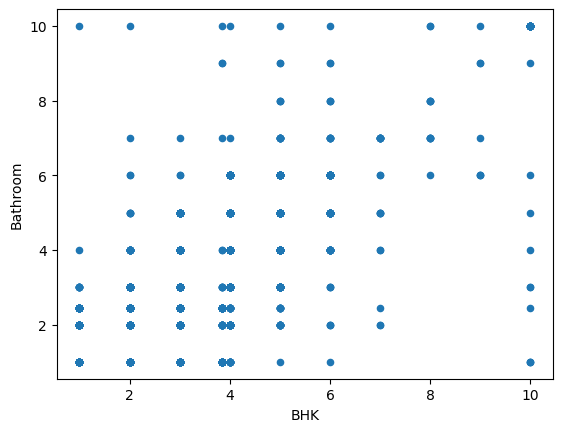

In [27]:
hp8.plot(kind='scatter',x='BHK', y='Bathroom')

In above scatter plot we can see that 2 BHK is haing more than 2 bathrooms which is not possible at al and that values are nothing but outliers in a dataset. Also 10 BHK having 1 or less than 10 bathrooms is not realistic at all.

Let's remove records where no. of bathrooms is more than no. of bedrooms.

<Axes: xlabel='BHK', ylabel='Bathroom'>

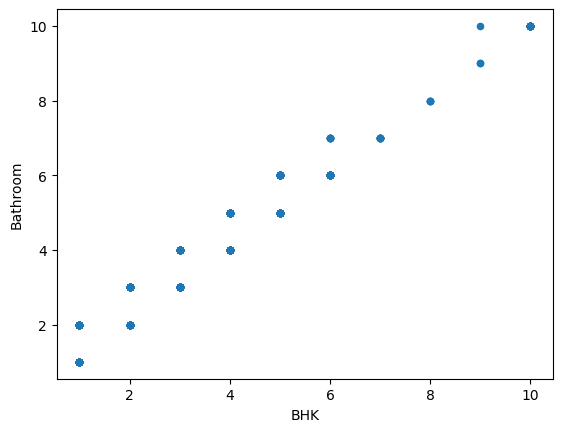

In [28]:
hp9 = hp8[~ ((hp8['Bathroom'] != hp8['BHK']) & (hp8['Bathroom'] != (hp8['BHK'] +1)))]

hp9.plot(kind='scatter',x='BHK', y='Bathroom')

<Axes: xlabel='BHK', ylabel='Balcony'>

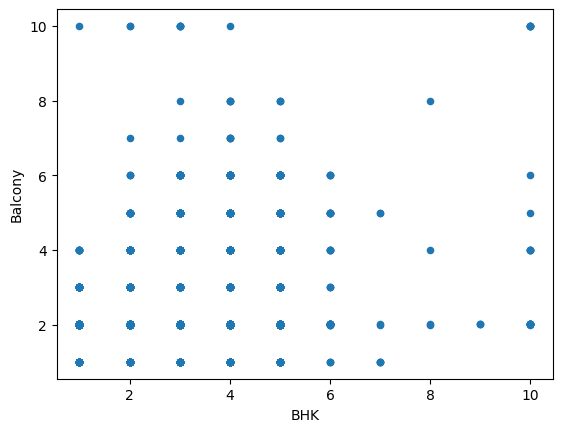

In [29]:
hp9.plot(kind='scatter',x='BHK', y='Balcony')

In above scatter plot we can see that 2 BHK is haing more than 3 balconys which is not possible at all and that values are nothing but outliers in a dataset.

House can have less no. of balcony or no balcony but having more no. of balcony than no. of bedrooms.

Let's remove records where no. of balcony is more than no. of bedrooms.


<Axes: xlabel='BHK', ylabel='Balcony'>

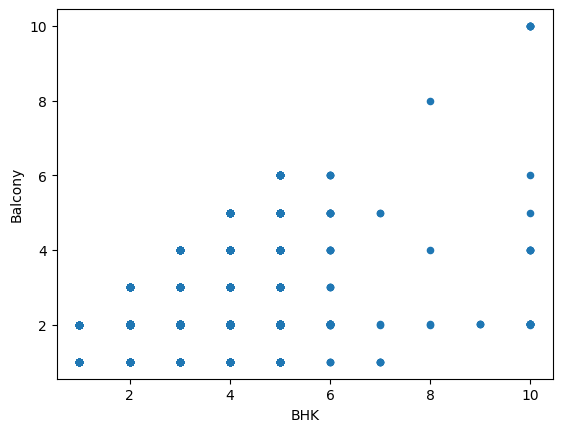

In [30]:
hp10 = hp9[~ (hp9['Balcony'] > (hp9['BHK'] +1))]

hp10.plot(kind='scatter',x='BHK', y='Balcony')

**Feature scaling & outlier removal using z-score method**
Z-score method : Z-score calculates deviation of eachdata from mean value. The data point which is away from mean by 3 deviation is considered as outlier.

                       **z-score = (x - mean)/(mean - standrd_deviation)**
Let's calculate z-score for the dataset

In [31]:
mean_values = hp10.loc[:, hp10.columns != 'Amount'].mean()
std_values = hp10.loc[:, hp10.columns != 'Amount'].std()

hp11 = (hp10.loc[:, hp10.columns != 'Amount'] - mean_values)/(mean_values - std_values)

hp11['Amount'] = hp10['Amount']

hp11

,Floor,Bathroom,Balcony,BHK,Carpet_area_sqft,Transaction_New Property,Transaction_Other,Transaction_Rent/Lease,Transaction_Resale,Transaction_Unknown,...,location_ranchi,location_sonipat,location_surat,location_thane,location_vadodara,location_vijayawada,location_visakhapatnam,location_zirakpur,Price_per_sqft,Amount
0,9.865749,-0.904286,0.030999,-0.861416,0.568173,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,-11.742186,0.138078,0.064221,0.113903,0.105680,0.119201,42
1,-3.290661,-0.345246,0.041908,-0.308384,0.588910,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,-11.742186,0.138078,0.064221,0.113903,0.105680,-0.436041,98
2,9.865749,-0.345246,0.041908,-0.308384,0.353891,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,-11.742186,0.138078,0.064221,0.113903,0.105680,-0.699530,140.0
3,-7.049635,-0.904286,-0.804199,-0.861416,0.545132,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,-11.742186,0.138078,0.064221,0.113903,0.105680,0.006446,25
4,28.660620,-0.345246,0.041908,-0.308384,0.464488,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,-11.742186,0.138078,0.064221,0.113903,0.105680,-0.793791,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,-5.170148,0.213793,0.866198,0.244648,0.010283,-4.079956,0.076031,0.00272,-2.370375,0.01746,...,0.06182,0.070063,0.135924,0.103750,0.138078,0.064221,0.113903,-11.568148,0.316765,63
187527,-1.411174,0.213793,0.041908,0.244648,0.010283,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,0.103750,0.138078,0.064221,0.113903,-11.568148,0.313276,55
187528,-7.049635,0.213793,0.030999,0.244648,-0.007854,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,0.103750,0.138078,0.064221,0.113903,-11.568148,0.237170,76
187529,-5.170148,-0.345246,0.041908,-0.308384,0.010283,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,0.103750,0.138078,0.064221,0.113903,-11.568148,0.245144,30


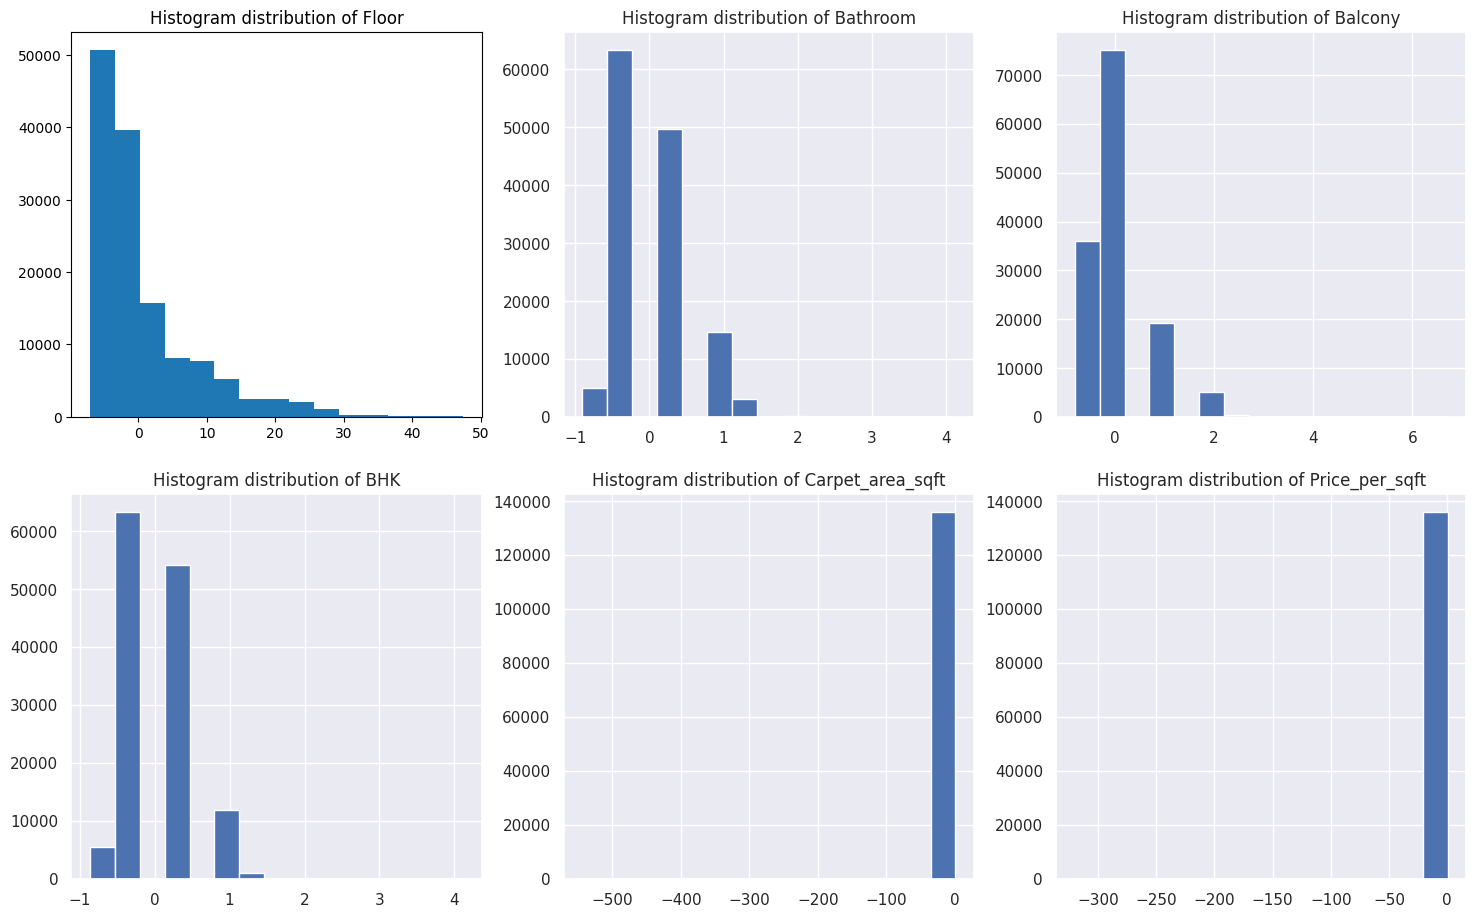

In [32]:
numerical_column = ['Floor', 'Bathroom', 'Balcony', 'BHK', 'Carpet_area_sqft', 'Price_per_sqft']

import seaborn as sns


plt.figure(figsize=(18,11))
for i,j in zip(range(1, 8),numerical_column):
    plt.subplot(2, 3, i)
    plt.hist(hp11[j], bins = 15)
    sns.set_theme()
    plt.title('Histogram distribution of {}'.format(j))

In [33]:
from scipy.stats import zscore

hp12 = hp11[(np.abs(zscore(hp11[numerical_column])) < 3).all(axis=1)]
hp12

,Floor,Bathroom,Balcony,BHK,Carpet_area_sqft,Transaction_New Property,Transaction_Other,Transaction_Rent/Lease,Transaction_Resale,Transaction_Unknown,...,location_ranchi,location_sonipat,location_surat,location_thane,location_vadodara,location_vijayawada,location_visakhapatnam,location_zirakpur,Price_per_sqft,Amount
0,9.865749,-0.904286,0.030999,-0.861416,0.568173,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,-11.742186,0.138078,0.064221,0.113903,0.105680,0.119201,42
1,-3.290661,-0.345246,0.041908,-0.308384,0.588910,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,-11.742186,0.138078,0.064221,0.113903,0.105680,-0.436041,98
2,9.865749,-0.345246,0.041908,-0.308384,0.353891,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,-11.742186,0.138078,0.064221,0.113903,0.105680,-0.699530,140.0
3,-7.049635,-0.904286,-0.804199,-0.861416,0.545132,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,-11.742186,0.138078,0.064221,0.113903,0.105680,0.006446,25
5,-5.170148,-0.904286,-0.804199,-0.861416,0.010283,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,-11.742186,0.138078,0.064221,0.113903,0.105680,0.075203,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,-5.170148,0.213793,0.866198,0.244648,0.010283,-4.079956,0.076031,0.00272,-2.370375,0.01746,...,0.06182,0.070063,0.135924,0.103750,0.138078,0.064221,0.113903,-11.568148,0.316765,63
187527,-1.411174,0.213793,0.041908,0.244648,0.010283,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,0.103750,0.138078,0.064221,0.113903,-11.568148,0.313276,55
187528,-7.049635,0.213793,0.030999,0.244648,-0.007854,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,0.103750,0.138078,0.064221,0.113903,-11.568148,0.237170,76
187529,-5.170148,-0.345246,0.041908,-0.308384,0.010283,1.325625,0.076031,0.00272,0.792243,0.01746,...,0.06182,0.070063,0.135924,0.103750,0.138078,0.064221,0.113903,-11.568148,0.245144,30


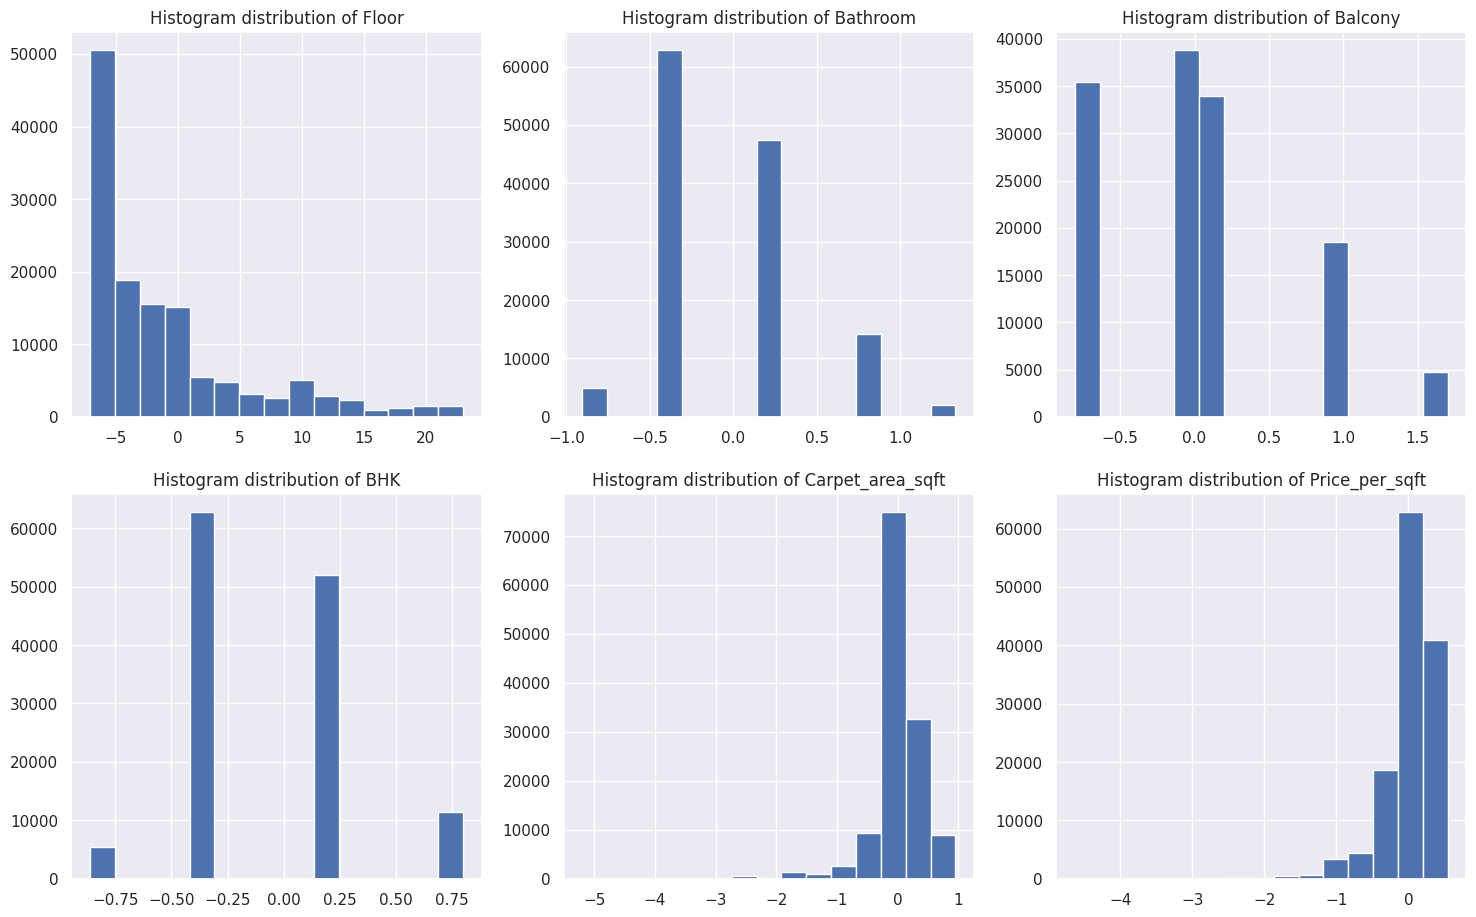

In [34]:
import seaborn as sns


plt.figure(figsize=(18,11))
for i,j in zip(range(1, 8),numerical_column):
    plt.subplot(2, 3, i)
    plt.hist(hp12[j], bins = 15)
    sns.set_theme()
    plt.title('Histogram distribution of {}'.format(j))

In [35]:
hp12.describe()

,Floor,Bathroom,Balcony,BHK,Carpet_area_sqft,Transaction_New Property,Transaction_Other,Transaction_Rent/Lease,Transaction_Resale,Transaction_Unknown,...,location_pune,location_ranchi,location_sonipat,location_surat,location_thane,location_vadodara,location_vijayawada,location_visakhapatnam,location_zirakpur,Price_per_sqft
count,131518.000000,131518.000000,131518.000000,131518.000000,131518.000000,131518.000000,131518.000000,131518.000000,131518.000000,131518.000000,...,131518.000000,131518.000000,131518.000000,131518.000000,131518.000000,131518.000000,131518.000000,131518.000000,131518.000000,131518.000000
mean,-0.756420,-0.018090,-0.013636,-0.017395,0.027933,-0.018393,-0.002516,-0.000090,-0.011289,-0.000127,...,-0.000780,-0.001768,0.001799,-0.001717,0.008455,-0.004208,-0.001856,-0.003435,-0.001723,0.013572
std,6.555632,0.443233,0.620447,0.393297,0.422112,2.336419,1.093604,1.019179,1.376813,1.021151,...,1.133962,1.076843,1.056291,1.142972,1.058199,1.155031,1.079437,1.130397,1.114572,0.335866
min,-7.049635,-0.904286,-0.804199,-0.861416,-5.192868,-4.079956,-15.228370,-369.606837,-2.370375,-59.290517,...,-9.785398,-18.237757,-16.342862,-9.492914,-11.742186,-9.380312,-17.635224,-10.893253,-11.568148,-4.631365
25%,-5.170148,-0.345246,-0.804199,-0.308384,0.010283,1.325625,0.076031,0.002720,-2.370375,0.017460,...,0.130636,0.061820,0.070063,0.135924,0.103750,0.138078,0.064221,0.113903,0.105680,-0.072720
50%,-3.290661,-0.345246,0.030999,-0.308384,0.010283,1.325625,0.076031,0.002720,0.792243,0.017460,...,0.130636,0.061820,0.070063,0.135924,0.103750,0.138078,0.064221,0.113903,0.105680,0.106244
75%,0.468313,0.213793,0.041908,0.244648,0.222557,1.325625,0.076031,0.002720,0.792243,0.017460,...,0.130636,0.061820,0.070063,0.135924,0.103750,0.138078,0.064221,0.113903,0.105680,0.227559
max,23.022159,1.331871,1.701397,0.797679,0.951423,1.325625,0.076031,0.002720,0.792243,0.017460,...,0.130636,0.061820,0.070063,0.135924,0.103750,0.138078,0.064221,0.113903,0.105680,0.546366


**Now let's partition our dataset into Train, Valid and Test**

In [36]:
X = hp12.iloc[:, 0:-1]
y = (hp12['Amount'])

print(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape); print(X_test.shape)

0            42
1            98
2         140.0
3            25
5            45
          ...  
187526       63
187527       55
187528       76
187529       30
187530    118.0
Name: Amount, Length: 131518, dtype: object
(105214, 81)
(26304, 81)


In [64]:
x_train = np.array(X_train).astype('float32')
y_train = np.array(y_train).astype('float32')
x_test = np.array(X_test).astype('float32')
y_test = np.array(y_test).astype('float32')

**Model Building**


We will check performance of model by using various optimizers such as SGD, Adam, Adagrad & RMSPROP. We will fine tune every model and will try to get best result for each model by fine tuning the hyerparameters.




**Keras-Tuner**

Keras tuner is framework which facilitates the hyperparameter search for neural network. This helps to decide which architecture (set of hyperparameters such as no.of neurons & layers, optimizers) is giving best result over our dataset and we can build our model using the best architecture of neural network. We will use keras tuner to search neural network hyperparameters.

In [ ]:
pip install keras-tuner --upgrade

  Using cached keras_tuner-1.4.5-py3-none-any.whl (129 kB)
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.0.4
    Uninstalling keras-tuner-1.0.4:
      Successfully uninstalled keras-tuner-1.0.4


**Hyperparameter Tunning**


Let's tune Neural network hyper-parameter to get better prediction. for this we will use keras-tuner

In [ ]:
!pip install keras-tuner==1.0.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.2 MB/s eta 0:00:00


In [ ]:
c=0

**Hyperparameter Tunning**

We will try to tune No. of neural network layers, neurons, l2 regularizer value and optimizers.
From previous neural neetwork model we have seen L2 regularizer is more effective than L1 regularizer so we will use L2 regularization and will try to tune best value for it.

In [ ]:
import keras_tuner
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

#

def build_model(hp):
  c=0
  model = Sequential()
  model.add(tf.keras.layers.Flatten())
  for i in range(hp.Int("num_layers", 1, 7)):
    if c==0:
      model.add(Dense(
          units=hp.Int(f"units_{i}", min_value=4, max_value=256, step=4),
          activation= "relu",
          kernel_initializer=tf.keras.initializers.HeNormal()
          ))
      c+=1
    else:
      model.add(Dense(
          units=hp.Int(f"units_{i}", min_value=4, max_value=256, step=4),
          activation= "relu",
          kernel_regularizer=regularizers.l2(hp.Float("reg_value", min_value=0.1, max_value=10, step=0.2)))
          )



      c+=1
      #model.add(tf.keras.layers.Dropout(hp.Float("dropout", min_value=0, max_value=0.5, step=0.1)))





  model.add(Dense(units=1, activation='linear'))
  model.compile(optimizer = hp.Choice("Optimizers", ["Adam", "RMSprop", "Adagrad", "SGD"]),
      loss='mse', metrics=["mse"])
  return model

  build_model(keras_tuner.HyperParameters())

In [ ]:
tuner = keras_tuner.RandomSearch(
    hypermodel = build_model,
    objective="mse",
    max_trials = 5,
    directory="my-dir",
    project_name="houseprice1"
)

In [ ]:
tuner.search(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)
#print(on_trial_end())

Trial 5 Complete [00h 01m 23s]
mse: 951.899658203125

Best mse So Far: 783.5260620117188
Total elapsed time: 00h 06m 15s


In [ ]:
tuner.results_summary()

Results summary
Results in my-dir/houseprice1
Showing 10 best trials
Objective(name='mse', direction='min')
Trial summary
Hyperparameters:
num_layers: 7
units_0: 232
Optimizers: RMSprop
units_1: 172
reg_value: 0.1
units_2: 160
units_3: 52
units_4: 4
units_5: 4
units_6: 4
Score: 783.5260620117188
Trial summary
Hyperparameters:
num_layers: 4
units_0: 92
Optimizers: Adam
units_1: 144
reg_value: 1.1000000000000003
units_2: 44
units_3: 228
Score: 811.993896484375
Trial summary
Hyperparameters:
num_layers: 3
units_0: 244
Optimizers: RMSprop
units_1: 20
reg_value: 4.1000000000000005
units_2: 156
units_3: 92
units_4: 232
units_5: 204
units_6: 36
Score: 871.6798706054688
Trial summary
Hyperparameters:
num_layers: 5
units_0: 84
Optimizers: RMSprop
units_1: 108
reg_value: 4.7
units_2: 28
units_3: 188
units_4: 196
units_5: 108
units_6: 168
Score: 951.899658203125
Trial summary
Hyperparameters:
num_layers: 4
units_0: 56
Optimizers: SGD
units_1: 4
reg_value: 0.1
units_2: 4
units_3: 4
Score: 16092.07

In [ ]:
# 4.2. Print the results of the best model
best_model = tuner.get_best_models(num_models=1)[0]



In [ ]:
tuner.get_best_hyperparameters()[0].values


{'num_layers': 7,
 'units_0': 232,
 'Optimizers': 'RMSprop',
 'units_1': 172,
 'reg_value': 0.1,
 'units_2': 160,
 'units_3': 52,
 'units_4': 4,
 'units_5': 4,
 'units_6': 4}

In [ ]:
 history = best_model.fit(x_train, y_train, epochs=100, initial_epoch=10, batch_size=64, validation_split=0.2, verbose=1)


Epoch 11/100
1316/1316 [==============================] - 5s 3ms/step - loss: 760.0891 - mse: 736.9246 - val_loss: 872.1919 - val_mse: 848.7282
Epoch 12/100
1316/1316 [==============================] - 5s 4ms/step - loss: 741.4857 - mse: 717.6544 - val_loss: 875.5860 - val_mse: 851.5911
Epoch 13/100
1316/1316 [==============================] - 4s 3ms/step - loss: 719.2746 - mse: 694.8181 - val_loss: 845.7276 - val_mse: 821.3658
Epoch 14/100
1316/1316 [==============================] - 4s 3ms/step - loss: 707.7281 - mse: 682.9446 - val_loss: 789.6323 - val_mse: 764.7985
Epoch 15/100
1316/1316 [==============================] - 5s 4ms/step - loss: 694.9529 - mse: 670.1146 - val_loss: 848.4094 - val_mse: 823.5410
Epoch 16/100
1316/1316 [==============================] - 4s 3ms/step - loss: 681.9117 - mse: 657.0460 - val_loss: 773.9703 - val_mse: 749.0153
Epoch 17/100
1316/1316 [==============================] - 4s 3ms/step - loss: 663.6671 - mse: 638.7518 - val_loss: 788.8773 - val_mse: 7

In [ ]:
train_acc_best_model = best_model.evaluate(x_train, y_train, verbose=0)
print("Train data accuracy= %3f", train_acc_best_model)

Train data accuracy= %3f [368.6640625, 333.7633056640625]


In [ ]:
test_acc_best_model = best_model.evaluate(x_test, y_test, verbose=0)
print("Test data accuracy= %3f", test_acc_best_model)

Test data accuracy= %3f [735.5791015625, 700.6785888671875]


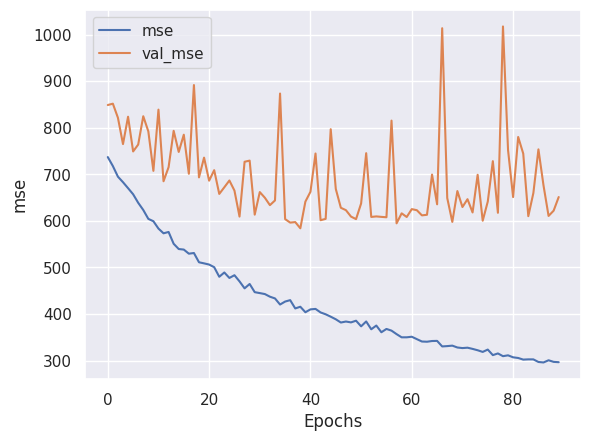

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mse')

# Conclusion

In this project we have applied neural network to predict house prices using verious optiizers to optimize the final results.
We trained model using verious optimizers and fine tuned hyperparameters to get best results. We also used keras tuner to find best optimizer and hyperprameters for a model and based on result we can conclude that **RMSPROP** is best optimizer for a model.
